<a href="https://colab.research.google.com/github/krakoshian/ex-14/blob/main/Kadir_Tolkay_uludag_q2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

<font size="5">Q2-a</font>

**It can be seen from the article**

1) ommiting one passband at a time from the SED fit (the Jacknife method; six fits)

2) uniformly weighting all datapoints in the fit for each galaxy 

3) adding random magnitude offsets with sizes corresponding to the magnitude error to all the galaxy photometry and redoing the
fits


systematic uncertainities from; galaxy age, dust and brusts of SF

<font size="5">Q2-b</font>

In [ ]:
df = pd.read_csv(
    'tableBell2003.txt',
    header=0,
    names=['z1', 'z1_age', 'z1_B', 'z1_V', 'z2', 'z2_age', 'z2_B', 'z2_V'],
    sep='\s+')
z1, z1_age, z1_B, z1_V, z2, z2_age, z2_B, z2_V = df['z1'], df['z1_age'], df[
    'z1_B'], df['z1_V'], df['z2'], df['z2_age'], df['z2_B'], df['z2_V']

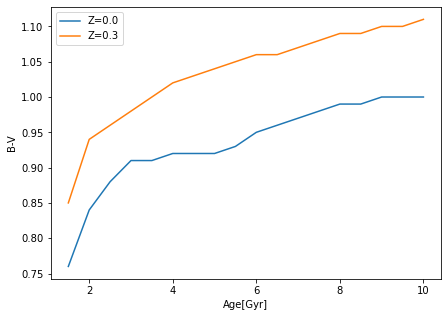

In [ ]:
z1_BV = z1_B - z1_V
z2_BV = z2_B - z2_V

plt.figure(figsize=(7, 5))

plt.plot(z1_age, z1_BV, label='Z=0.0')
plt.plot(z2_age, z2_BV, label='Z=0.3')

plt.legend()
plt.xlabel('Age[Gyr]')
plt.ylabel('B-V')

plt.show()

<font size="5">Q2-c</font>

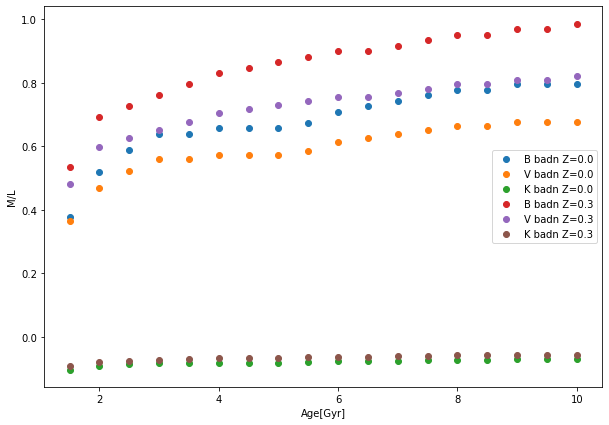

In [ ]:
a_b = -0.942
b_b = 1.737
a_v = -0.628
b_v = 1.305
a_k = -0.206
b_k = 0.135

z1_logmL_b = a_b + b_b * z1_BV
z1_logmL_v = a_v + b_v * z1_BV
z1_logmL_k = a_k + b_k * z1_BV

z2_logmL_b = a_b + b_b * z2_BV
z2_logmL_v = a_v + b_v * z2_BV
z2_logmL_k = a_k + b_k * z2_BV

plt.figure(figsize=(10,7))

plt.plot(z1_age,z1_logmL_b,'o', label = 'B badn Z=0.0')
plt.plot(z1_age,z1_logmL_v,'o', label = 'V badn Z=0.0')
plt.plot(z1_age,z1_logmL_k,'o', label = 'K badn Z=0.0')

plt.plot(z2_age,z2_logmL_b,'o', label = 'B badn Z=0.3')
plt.plot(z2_age,z2_logmL_v,'o', label = 'V badn Z=0.3')
plt.plot(z2_age,z2_logmL_k,'o', label = 'K badn Z=0.3')

plt.legend()
plt.xlabel('Age[Gyr]')
plt.ylabel('M/L')

plt.show()

<font size="5">Q2-d</font>

Here the method from Scipy.optimize which called curve_fit is used. Also, one has to be careful since all the  𝑀/𝐿  ratios are in  𝐿𝑜𝑔  from there for the fitting function should be converted to Log form, too.

  𝑓(𝑡)=𝑐𝑜𝑛𝑠𝑡+𝛼log𝑡

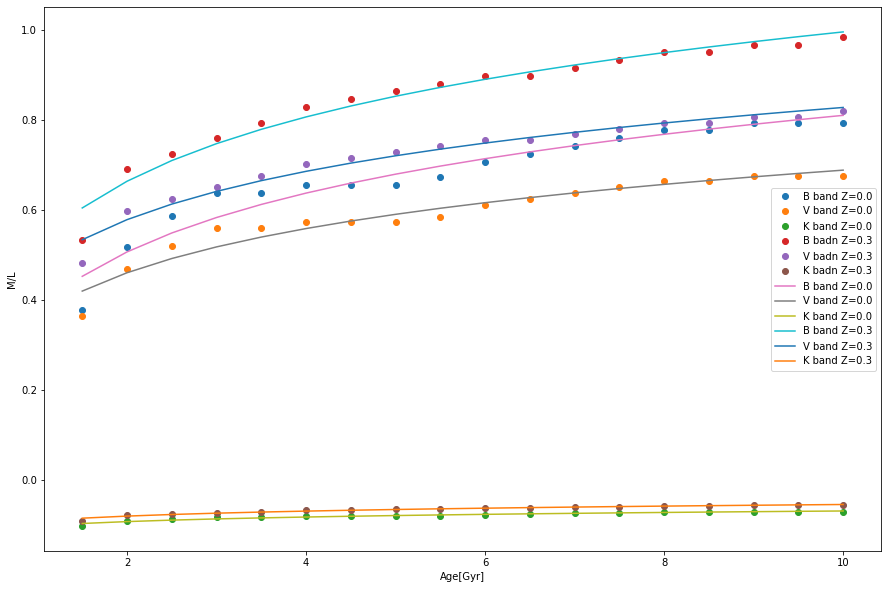

In [ ]:
from scipy.optimize import curve_fit


def func(t, A, B):
    return A + B * np.log10(t)


z1_b_popt, pcov = curve_fit(func, z1_age, z1_logmL_b)
z1_v_popt, pcov = curve_fit(func, z1_age, z1_logmL_v)
z1_k_popt, pcov = curve_fit(func, z1_age, z1_logmL_k)

z2_b_popt, pcov = curve_fit(func, z2_age, z2_logmL_b)
z2_v_popt, pcov = curve_fit(func, z2_age, z2_logmL_v)
z2_k_popt, pcov = curve_fit(func, z2_age, z2_logmL_k)

plt.figure(figsize=(15, 10))

plt.plot(z1_age, z1_logmL_b, 'o', label='B band Z=0.0')
plt.plot(z1_age, z1_logmL_v, 'o', label='V band Z=0.0')
plt.plot(z1_age, z1_logmL_k, 'o', label='K band Z=0.0')

plt.plot(z2_age, z2_logmL_b, 'o', label='B badn Z=0.3')
plt.plot(z2_age, z2_logmL_v, 'o', label='V badn Z=0.3')
plt.plot(z2_age, z2_logmL_k, 'o', label='K badn Z=0.3')

plt.plot(z1_age, func(z1_age, *z1_b_popt), label='B band Z=0.0')
plt.plot(z1_age, func(z1_age, *z1_v_popt), label='V band Z=0.0')
plt.plot(z1_age, func(z1_age, *z1_k_popt), label='K band Z=0.0')

plt.plot(z2_age, func(z2_age, *z2_b_popt), label='B band Z=0.3')
plt.plot(z2_age, func(z2_age, *z2_v_popt), label='V band Z=0.3')
plt.plot(z2_age, func(z2_age, *z2_k_popt), label='K band Z=0.3')

plt.legend()
plt.xlabel('Age[Gyr]')
plt.ylabel('M/L')

plt.show()

<font size="5">Q2-e</font>


When concerning the metallicity, the metal rich galaxy is less luminous in all the bands than the metal poor one. Therefore, one can infer that the star formation rate is more in the given metal poor galaxy .

<font size="7">Q3</font>


In [ ]:
logM_TO = lambda t: 0.0434 * (np.log10(t))**2 - 1.146 * np.log10(t) + 7.119
logM_D = lambda t: 0.0379 * (np.log10(t))**2 - 1.048 * np.log10(t) + 6.719

<font size="5">Q3-a</font>

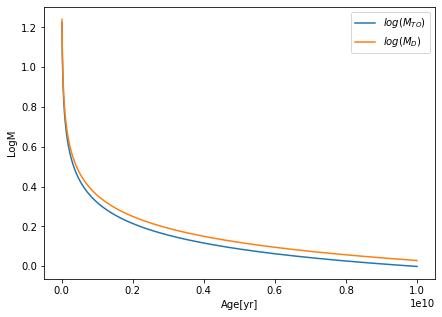

In [ ]:
t = np.linspace((10**7), (10**10), 1000)

plt.figure(figsize=(7, 5))
plt.plot(t, logM_TO(t), label='$log(M_{TO})$')
plt.plot(t, logM_D(t), label='$log(M_D)$')

plt.legend()
plt.xlabel('Age[yr]')
plt.ylabel('LogM')

plt.show()

<font size="5">Q3-b</font>

In [ ]:
print('The M_TO for 10^7:  ', 10**logM_TO(10**7))
print('The M_TO for 10^8:  ', 10**logM_TO(10**8))
print('The M_TO for 10^9:  ', 10**logM_TO(10**8))
print('The M_TO for 10^10: ', 10**logM_TO(10**10))

The M_TO for 10^7:   16.734009068393174
The M_TO for 10^8:   5.353033977441431
The M_TO for 10^9:   5.353033977441431
The M_TO for 10^10:  0.9977000638225546


<font size="5">Q3-c</font>

In [ ]:
print('The M_D for 10^7:  ', 10**logM_D(10**7))
print('The M_D for 10^8:  ', 10**logM_D(10**8))
print('The M_D for 10^9:  ', 10**logM_D(10**8))
print('The M_D for 10^10: ', 10**logM_D(10**10))

The M_D for 10^7:   17.38201018249413
The M_D for 10^8:   5.762354864094255
The M_D for 10^9:   5.762354864094255
The M_D for 10^10:  1.06905487922266


<font size="5">Q3-d</font>

Since the stars is still active by our assumptions,  𝑀𝑇𝑂  have to be chosen.
To calculate  𝑡  for the star, the  𝑡𝐵𝐵  has to be subtracted form the given time.

𝑡𝑠𝑡𝑎𝑟=1.39×10^10−10^6

In [ ]:
t = 1.38 * 10**10 - 10**6
M = 10**logM_TO(t)
print('M is:', M)

M is: 0.9140525242730655
